In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim
import torch.utils.data
from torch.autograd import Variable
import pandas as pd
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("final.csv")
df["class"] = df["class"].replace({"AMO":0, "APO":1, "ATE":2, "IEO":3})
display(df)

,Unnamed: 0,Neo Reference ID,Absolute Magnitude,Relative Velocity km per sec,Miss Dist.(kilometers),orbit_id,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Motion,pha,diameter,albedo,rot_per,ma,class,data_arc,condition_code,rms
0,0,2000433,11.160,4.412295,54688084.0,611,0.0,0.150505,4.583,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,0.559880,0.0,25.208245,0.250,5.270,271.071733,0.0,46330.0,0.0,0.28397
1,1,2000719,15.500,NaN,NaN,214,NaN,0.203482,3.140,0.546558,11.567485,183.866950,1565.522356,1.196452,156.176338,4.080752,0.229955,0.0,NaN,NaN,5.801,140.273422,0.0,39593.0,0.0,0.39148
2,2,2000887,13.800,NaN,NaN,311,NaN,0.082217,3.221,0.570332,9.393852,110.434247,1421.113273,1.062886,350.495551,3.884588,0.253323,0.0,4.200000,0.310,73.970,294.579167,0.0,37558.0,0.0,0.44039
3,3,2001036,9.400,NaN,NaN,823,NaN,0.344956,3.035,0.533046,26.677641,215.546828,1588.828164,1.244304,132.364633,4.085146,0.226582,0.0,37.675000,0.238,10.297,4.817744,0.0,35105.0,0.0,0.38018
4,4,2001221,17.700,NaN,NaN,104,NaN,0.107450,3.781,0.435285,11.876540,171.327012,971.359459,1.083969,26.694788,2.755027,0.370615,0.0,1.000000,NaN,NaN,38.522411,0.0,32328.0,0.0,0.45839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24631,24631,54097467,21.000,NaN,NaN,2,NaN,0.192704,2.924,0.546396,40.718996,84.647128,1495.383864,1.160859,17.034483,3.957525,0.240741,0.0,NaN,NaN,NaN,351.405894,0.0,7.0,9.0,0.23911
24632,24632,54097667,23.463,NaN,NaN,1,NaN,0.045436,3.907,0.417971,25.603009,63.794186,853.955367,1.025263,12.696979,2.497806,0.421568,0.0,NaN,NaN,NaN,356.724840,0.0,10.0,8.0,0.45779
24633,24633,54097668,25.282,NaN,NaN,1,NaN,0.005352,3.141,0.621031,10.873610,250.148666,1454.746549,0.952203,153.118442,4.073027,0.247466,0.0,NaN,NaN,NaN,5.162592,1.0,1.0,8.0,0.43094
24634,24634,54097669,21.967,NaN,NaN,1,NaN,0.018582,4.201,0.399995,12.600106,129.455671,757.145564,0.975458,333.357399,2.276044,0.475470,1.0,NaN,NaN,NaN,344.370686,1.0,3.0,9.0,0.26581


In [ ]:
df = df.drop("Unnamed: 0",axis = 1)  
print('df number of records = '+str(df.shape[0]))
print('df number of variables = '+str(df.shape[1]))
df_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries'])
no_missing_entries = 0
for col in df.columns.values:
    list_vals = pd.unique(df[col])
    df_stats = df_stats.append({"Field_name":col, "Type":str(df[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isna(df[col]))) }, ignore_index=True)
    if np.sum(pd.isnull(df[col])) == 0:
        no_missing_entries +=1

    if len(list_vals) < 10:
        list_str = ''
        for n_value in range(0,len(list_vals)):
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('The only enteries in the field',col,'are:' +list_str[0:len(list_str)-2])
display(df_stats)    
print(" ")
print("The number of columns with no missing entries are",no_missing_entries)  

df number of records = 24636
df number of variables = 25
The only enteries in the field pha are:0.0, 1.0, nan
The only enteries in the field class are:0.0, 1.0, 2.0, 3.0, nan


,Field_name,Type,No_unique_vals,No_null_enteries
0,Neo Reference ID,int64,24636,0
1,Absolute Magnitude,float64,2717,10
2,Relative Velocity km per sec,float64,3693,20944
3,Miss Dist.(kilometers),float64,3676,20944
4,orbit_id,int64,330,0
5,Orbit Uncertainity,float64,11,20944
6,Minimum Orbit Intersection,float64,24381,1
7,Jupiter Tisserand Invariant,float64,4532,0
8,Eccentricity,float64,24629,0
9,Inclination,float64,24629,0


 
The number of columns with no missing entries are 11


In [ ]:
display(df.dropna())

,Neo Reference ID,Absolute Magnitude,Relative Velocity km per sec,Miss Dist.(kilometers),orbit_id,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Motion,pha,diameter,albedo,rot_per,ma,class,data_arc,condition_code,rms
0,2000433,11.16,4.412295,54688084.0,611,0.0,0.150505,4.583,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,0.559880,0.0,25.208245,0.250,5.2700,271.071733,0.0,46330.0,0.0,0.28397
5,2001566,16.90,21.324619,51882752.0,102,0.0,0.035204,5.299,0.826809,22.852053,88.082238,408.783979,0.186690,31.297264,1.969202,0.880661,1.0,1.792844,0.510,2.2726,192.083179,1.0,26002.0,0.0,0.34334
9,2001685,14.23,16.889892,23419550.0,358,0.0,0.050567,4.716,0.435874,9.381529,274.341995,583.865635,0.771233,127.072787,1.963026,0.616580,0.0,6.131160,0.310,10.1995,290.250651,1.0,26437.0,0.0,0.32415
10,2001862,16.25,19.179113,10684524.0,285,0.0,0.025757,4.415,0.559761,6.353446,35.731688,651.097991,0.647222,285.859380,2.293102,0.552912,1.0,2.418481,0.250,3.0650,88.546479,1.0,32849.0,0.0,0.48731
13,2001865,16.84,13.829367,44114508.0,132,0.0,0.156723,5.592,0.466929,16.095153,212.928389,409.983738,0.575745,325.256318,1.584363,0.878084,0.0,1.843073,0.220,6.8039,3.320368,1.0,17937.0,0.0,0.42450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11849,3695838,18.80,27.024173,20597912.0,44,3.0,0.138790,2.912,0.541644,48.033254,114.650476,1380.458038,1.112124,12.770238,3.740536,0.260783,0.0,0.747382,0.028,6.8300,148.657145,0.0,1458.0,1.0,0.31313
11907,3697798,20.50,21.876735,46984856.0,19,3.0,0.030815,3.288,0.638157,20.917550,244.886222,1203.225393,0.801099,245.185018,3.626780,0.299196,1.0,0.341619,0.126,3.3610,228.132370,1.0,189.0,3.0,0.32300
13816,3740100,23.60,14.996020,5265829.0,7,7.0,0.020857,4.075,0.569285,5.275017,96.445393,774.374255,0.710817,297.414317,2.589824,0.464891,0.0,0.081949,0.109,0.0085,46.979133,1.0,27.0,7.0,0.60944
14225,3748270,21.30,25.480702,32200928.0,37,3.0,0.005320,2.933,0.688874,22.456259,35.969525,1554.400365,0.817044,238.326758,4.435136,0.231601,1.0,0.236343,0.125,19.8000,337.595233,1.0,192.0,3.0,0.35724


In [ ]:
display(df.dropna(axis = 1))

,Neo Reference ID,orbit_id,Jupiter Tisserand Invariant,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Motion
0,2000433,611,4.583,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,0.559880
1,2000719,214,3.140,0.546558,11.567485,183.866950,1565.522356,1.196452,156.176338,4.080752,0.229955
2,2000887,311,3.221,0.570332,9.393852,110.434247,1421.113273,1.062886,350.495551,3.884588,0.253323
3,2001036,823,3.035,0.533046,26.677641,215.546828,1588.828164,1.244304,132.364633,4.085146,0.226582
4,2001221,104,3.781,0.435285,11.876540,171.327012,971.359459,1.083969,26.694788,2.755027,0.370615
...,...,...,...,...,...,...,...,...,...,...,...
24631,54097467,2,2.924,0.546396,40.718996,84.647128,1495.383864,1.160859,17.034483,3.957525,0.240741
24632,54097667,1,3.907,0.417971,25.603009,63.794186,853.955367,1.025263,12.696979,2.497806,0.421568
24633,54097668,1,3.141,0.621031,10.873610,250.148666,1454.746549,0.952203,153.118442,4.073027,0.247466
24634,54097669,1,4.201,0.399995,12.600106,129.455671,757.145564,0.975458,333.357399,2.276044,0.475470


In [ ]:
nonsparse_1 = ['Absolute Magnitude','orbit_id' ,'Eccentricity', 'Inclination', 'Asc Node Longitude', 'Orbital Period',
           'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'ma', 'rms', 'Mean Motion',
           'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'data_arc','class','pha']
df_ns = df[nonsparse_1].dropna()
display(df_ns)           

,Absolute Magnitude,orbit_id,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,ma,rms,Mean Motion,Minimum Orbit Intersection,Jupiter Tisserand Invariant,data_arc,class,pha
0,11.160,611,0.222589,10.827591,304.322163,642.995474,1.133419,178.816591,1.782461,271.071733,0.28397,0.559880,0.150505,4.583,46330.0,0.0,0.0
1,15.500,214,0.546558,11.567485,183.866950,1565.522356,1.196452,156.176338,4.080752,140.273422,0.39148,0.229955,0.203482,3.140,39593.0,0.0,0.0
2,13.800,311,0.570332,9.393852,110.434247,1421.113273,1.062886,350.495551,3.884588,294.579167,0.44039,0.253323,0.082217,3.221,37558.0,0.0,0.0
3,9.400,823,0.533046,26.677641,215.546828,1588.828164,1.244304,132.364633,4.085146,4.817744,0.38018,0.226582,0.344956,3.035,35105.0,0.0,0.0
4,17.700,104,0.435285,11.876540,171.327012,971.359459,1.083969,26.694788,2.755027,38.522411,0.45839,0.370615,0.107450,3.781,32328.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24631,21.000,2,0.546396,40.718996,84.647128,1495.383864,1.160859,17.034483,3.957525,351.405894,0.23911,0.240741,0.192704,2.924,7.0,0.0,0.0
24632,23.463,1,0.417971,25.603009,63.794186,853.955367,1.025263,12.696979,2.497806,356.724840,0.45779,0.421568,0.045436,3.907,10.0,0.0,0.0
24633,25.282,1,0.621031,10.873610,250.148666,1454.746549,0.952203,153.118442,4.073027,5.162592,0.43094,0.247466,0.005352,3.141,1.0,1.0,0.0
24634,21.967,1,0.399995,12.600106,129.455671,757.145564,0.975458,333.357399,2.276044,344.370686,0.26581,0.475470,0.018582,4.201,3.0,1.0,1.0


In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self,data , labels):
        self.labels = torch.FloatTensor(labels)
        self.data = torch.LongTensor(data)
 
  def __len__(self):
        return len(self.labels)
 
  def __getitem__(self, index):
        X = self.data[index]
        y = self.labels[index]
        return X, y

In [ ]:
df_sample = df_ns.sample(frac = 1)
y1 = df_sample["Minimum Orbit Intersection"]
y2 = df_sample["pha"]
df_sample = df_sample.drop(["pha","Minimum Orbit Intersection"],axis = 1)
df_np = df_sample.to_numpy()
y1_np = y1.to_numpy().reshape(-1, 1)
y2_np = y2.to_numpy().reshape(-1, 1)
df_norm = (df_np-np.mean(df_np,axis = 0))/np.std(df_np,axis = 0)
y1_norm = (y1_np-np.mean(y1_np))/np.std(y1_np).reshape(-1, 1)
y2_norm = (y2_np-np.mean(y2_np))/np.std(y2_np).reshape(-1, 1)

In [ ]:
dataset_r_train = Dataset(df_norm[:16184], y1_norm[:16184])
dataset_c_train = Dataset(df_norm[:16184], y2_np[:16184])
dataset_r_val = Dataset(df_norm[16184:20184], y1_norm[16184:20184])
dataset_c_test = Dataset(df_norm[:16184:20184], y2_np[16184:20184])
dataset_r_test = Dataset(df_norm[20184:], y1_norm[20184:])
dataset_c_val = Dataset(df_norm[20184:], y2_np[20184:])

In [ ]:
BATCH_SIZE = 8
df_stats = pd.DataFrame(columns = ['Layer_size', 'Learning_rate', 'Epoch_no','train_acc','val_acc','train_loss','val_loss'])
df_stats

,Layer_size,Learning_rate,Epoch_no,train_acc,val_acc,train_loss,val_loss


In [ ]:
train_loader_c = torch.utils.data.DataLoader(dataset_c_train,batch_size=BATCH_SIZE,shuffle=False,drop_last=False)
val_loader_c = torch.utils.data.DataLoader(dataset_c_val,batch_size=BATCH_SIZE,shuffle=False,drop_last=False)
test_loader_c = torch.utils.data.DataLoader(dataset_c_test,batch_size=BATCH_SIZE,shuffle=False,drop_last=False)

In [ ]:
class Neural_network(nn.Module):
  def __init__(self,hidden_layer = 8):
    super(Neural_network, self).__init__()
    self.fc1=nn.Linear(15,hidden_layer)
    self.fc2=nn.Linear(hidden_layer,2)
  
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)

In [ ]:
def fit(model, train_loader, size, lr, val_loader ):
    global df_stats
    optimizer = torch.optim.SGD(NN.parameters(),lr = lr)
    error = nn.CrossEntropyLoss()
    EPOCHS = 5
    model.train()

    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
            var_x_batch = Variable(x_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_x_batch)
            var_y_batch = var_y_batch.squeeze_()
            loss = error(output, var_y_batch.long())
            loss.backward()
            optimizer.step()

            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == var_y_batch).sum()
            #print(correct)
            if batch_idx % 1000 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch+1, batch_idx*len(x_batch), len(train_loader.dataset), 100*batch_idx / len(train_loader), loss.data, float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))
              
        correct_train = 0 
        running_loss_train = 0 
        correct_val = 0
        running_loss_val = 0
        for val_imgs, val_labels in val_loader:
            val_imgs = Variable(val_imgs).float()
            val_labels = val_labels.squeeze_()
            output = model(val_imgs)
            loss = error(output, val_labels.long())
            running_loss_val += loss.item() * val_imgs.size(0)

            predicted = torch.max(output,1)[1]
            correct_val += (predicted == val_labels).sum()
        

        print("Val accuracy:{:.3f}% ".format( 100*float(correct_val) / (len(val_loader)*BATCH_SIZE)))

        for train_imgs, train_labels in train_loader:
            train_imgs = Variable(train_imgs).float()
            output = model(train_imgs)
            train_labels = train_labels.squeeze_()
            loss = error(output, train_labels.long())
            running_loss_train += loss.item() * train_imgs.size(0)
            predicted = torch.max(output,1)[1]
            correct_train += (predicted == train_labels).sum()
        print("Train accuracy:{:.3f}% ".format( 100*float(correct_train) / (len(train_loader)*BATCH_SIZE)))
        df_stats = df_stats.append({'Layer_size':size, 'Learning_rate':lr, 'Epoch_no':epoch+1,'train_acc':100*float(correct_train) / (len(train_loader)*BATCH_SIZE) ,
                   'val_acc': 100*float(correct_val) / (len(val_loader)*BATCH_SIZE),'train_loss':running_loss_train/(len(train_loader)*BATCH_SIZE) ,
                              'val_loss':running_loss_val/(len(val_loader)*BATCH_SIZE)},ignore_index = True)


In [ ]:
size_array = [2,4,6,8,12]
lr_array = [1e-5,1e-4,1e-3,1e-2,1e-1]
for size in size_array:
  for lr in lr_array:
    print("Size:",size)
    print("Learning rate:",lr)
    NN = Neural_network(size)
    fit(NN,train_loader_c,size,lr,val_loader_c)
    print("----------------------------------------------------------------------------------------------------------")

Size: 2
Learning rate: 1e-05
Epoch : 1 [0/16184 (0%)]	Loss: 0.683964	 Accuracy:62.500%
Epoch : 1 [8000/16184 (49%)]	Loss: 0.705976	 Accuracy:51.099%
Epoch : 1 [16000/16184 (99%)]	Loss: 0.650828	 Accuracy:51.924%
Val accuracy:54.200% 
Train accuracy:54.609% 
Epoch : 2 [0/16184 (0%)]	Loss: 0.677199	 Accuracy:62.500%
Epoch : 2 [8000/16184 (49%)]	Loss: 0.696982	 Accuracy:55.994%
Epoch : 2 [16000/16184 (99%)]	Loss: 0.641765	 Accuracy:56.366%
Val accuracy:57.875% 
Train accuracy:58.051% 
Epoch : 3 [0/16184 (0%)]	Loss: 0.670578	 Accuracy:62.500%
Epoch : 3 [8000/16184 (49%)]	Loss: 0.688155	 Accuracy:59.316%
Epoch : 3 [16000/16184 (99%)]	Loss: 0.632873	 Accuracy:59.920%
Val accuracy:61.475% 
Train accuracy:61.715% 
Epoch : 4 [0/16184 (0%)]	Loss: 0.664093	 Accuracy:62.500%
Epoch : 4 [8000/16184 (49%)]	Loss: 0.679493	 Accuracy:63.524%
Epoch : 4 [16000/16184 (99%)]	Loss: 0.624152	 Accuracy:64.480%
Val accuracy:66.175% 
Train accuracy:65.929% 
Epoch : 5 [0/16184 (0%)]	Loss: 0.657750	 Accuracy:62.50

In [ ]:
df_stats

,Layer_size,Learning_rate,Epoch_no,train_acc,val_acc,train_loss,val_loss
0,2.0,0.00001,1.0,54.609491,54.200,0.679049,0.677603
1,2.0,0.00001,2.0,58.051162,57.875,0.671668,0.670200
2,2.0,0.00001,3.0,61.715274,61.475,0.664433,0.662945
3,2.0,0.00001,4.0,65.929313,66.175,0.657348,0.655840
4,2.0,0.00001,5.0,72.627286,73.275,0.650411,0.648884
...,...,...,...,...,...,...,...
120,12.0,0.10000,1.0,91.293870,91.475,0.222473,0.221460
121,12.0,0.10000,2.0,91.312407,91.475,0.218527,0.218249
122,12.0,0.10000,3.0,91.368018,91.500,0.215751,0.216260
123,12.0,0.10000,4.0,91.454523,91.525,0.214133,0.214637


------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 2


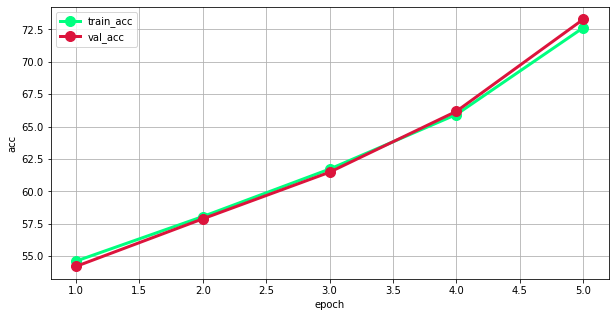

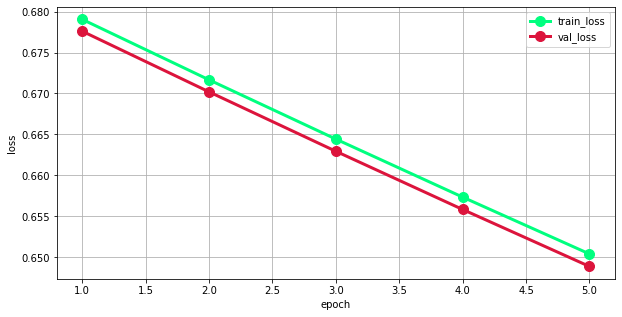

------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 4


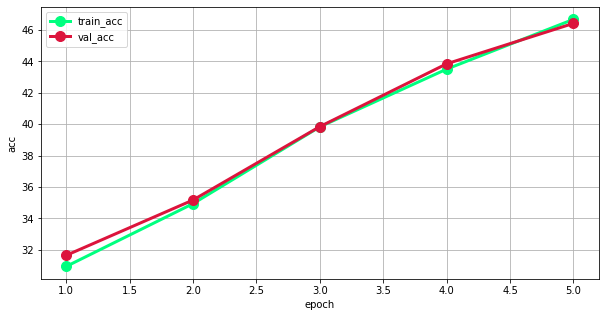

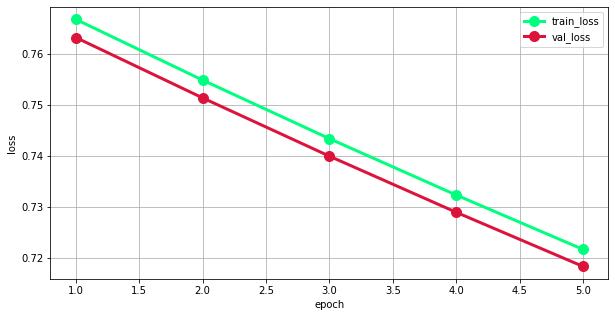

------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 6


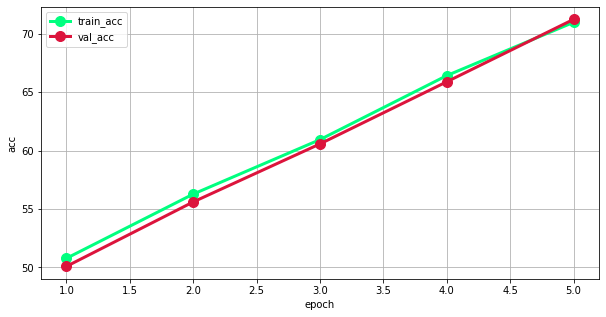

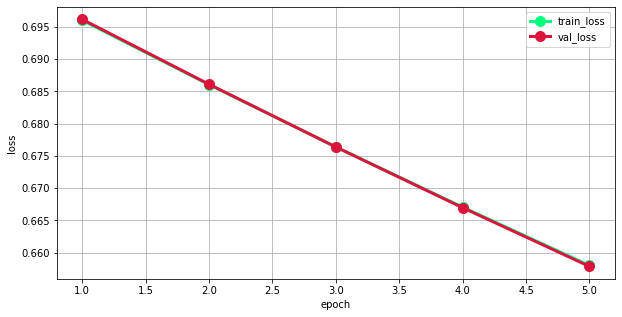

------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 8


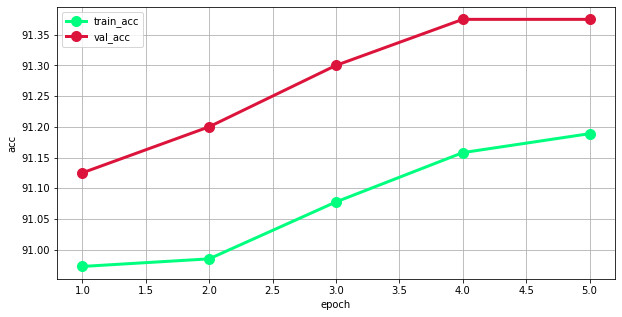

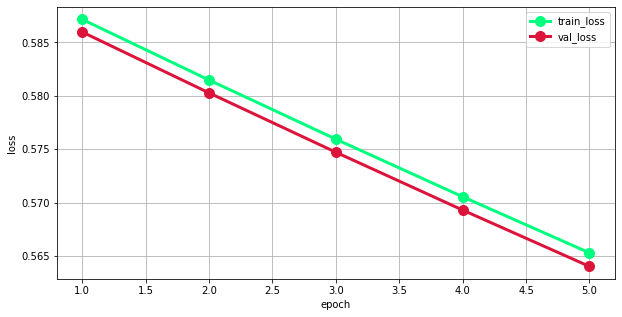

------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 12


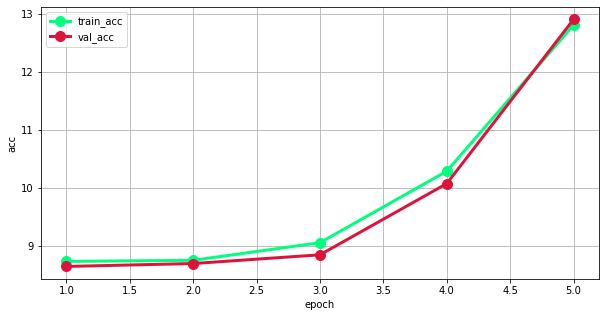

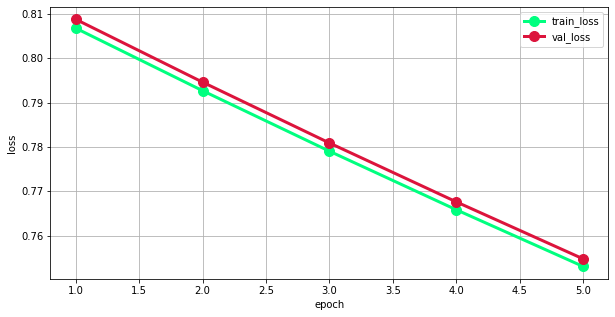

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 2


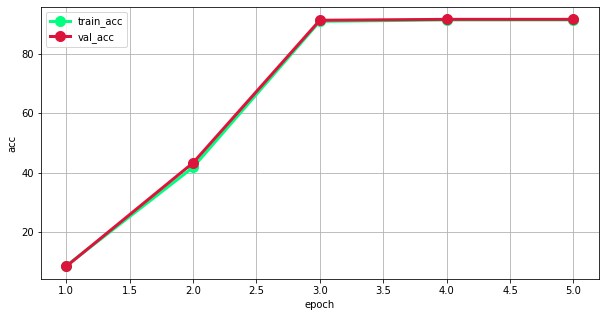

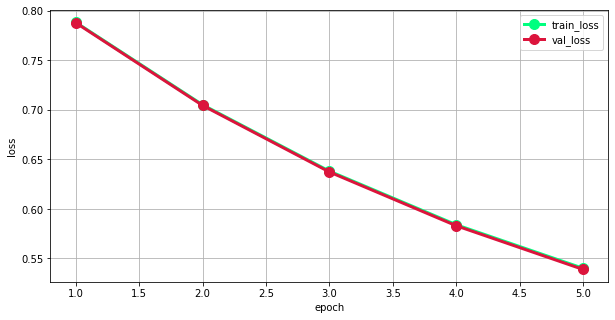

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 4


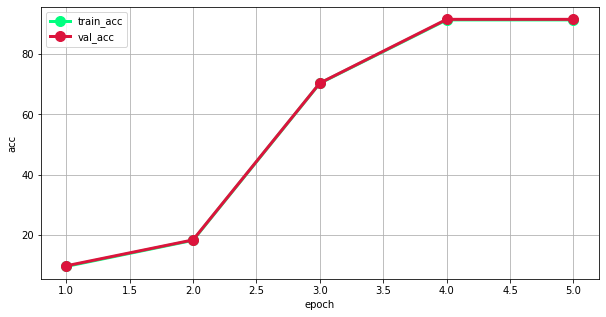

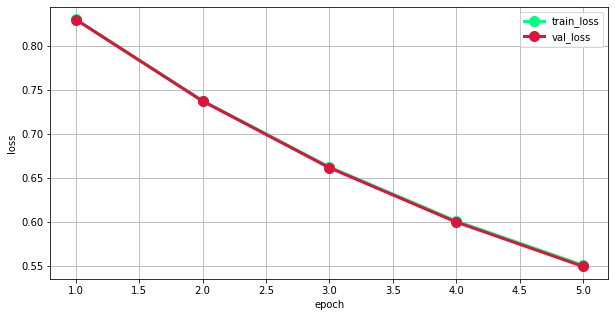

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 6


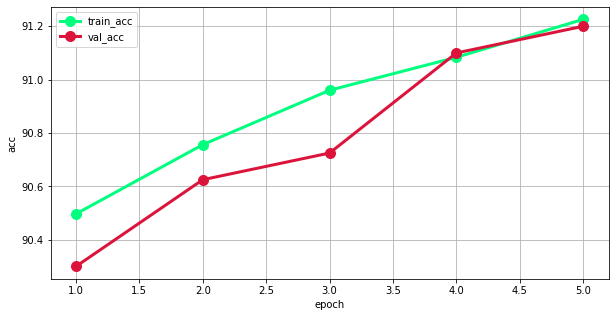

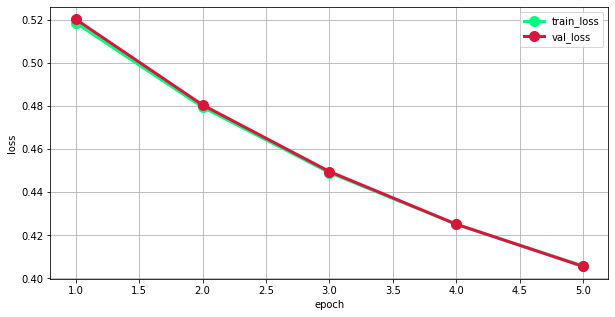

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 8


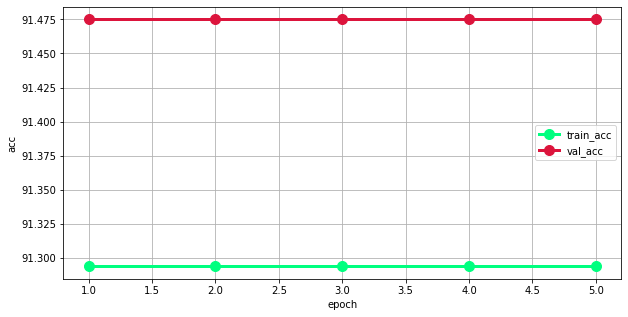

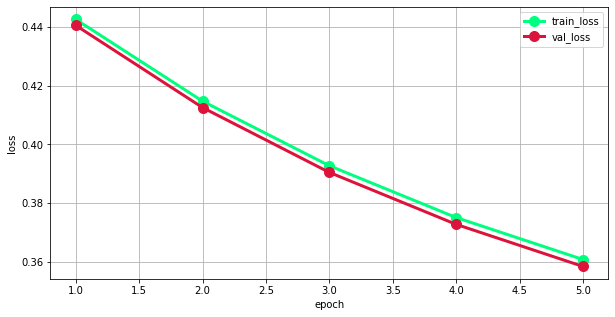

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 12


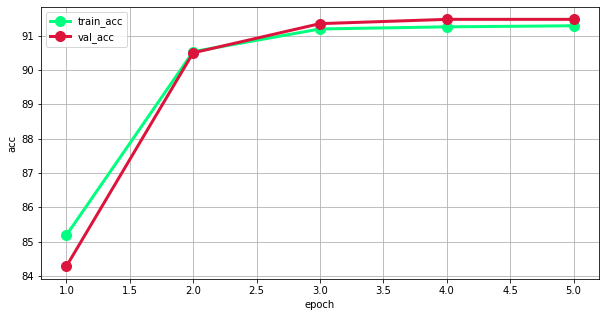

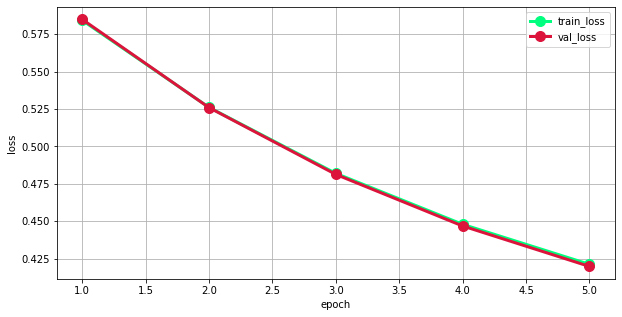

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 2


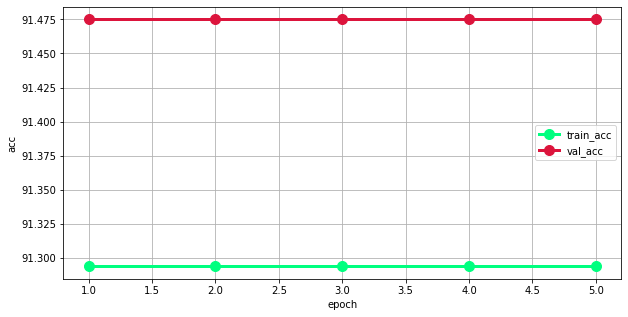

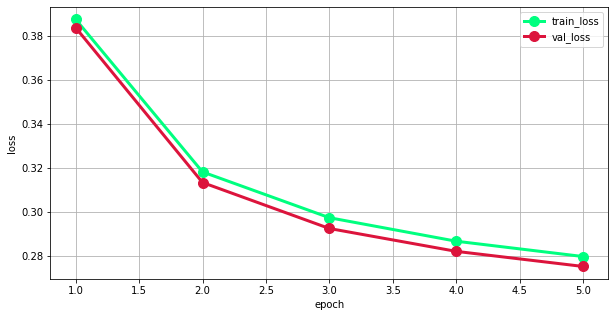

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 4


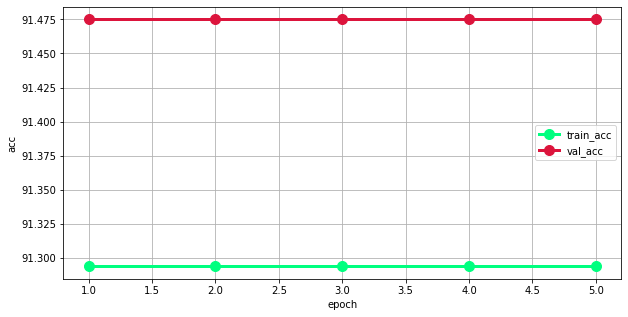

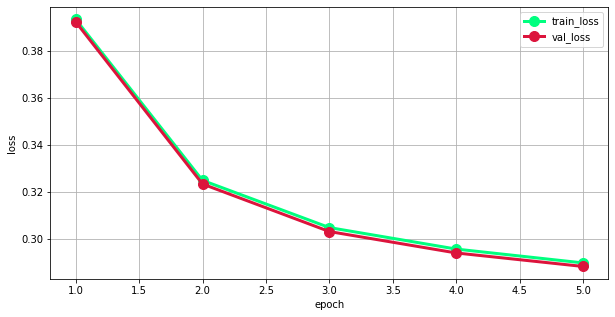

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 6


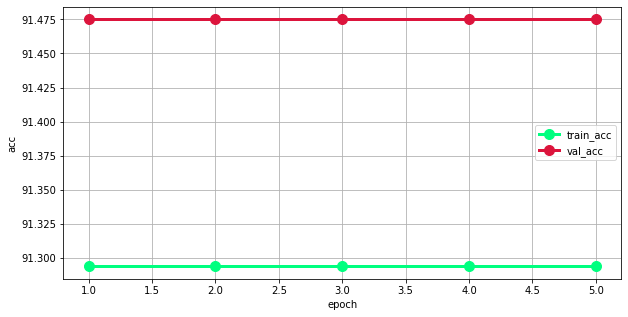

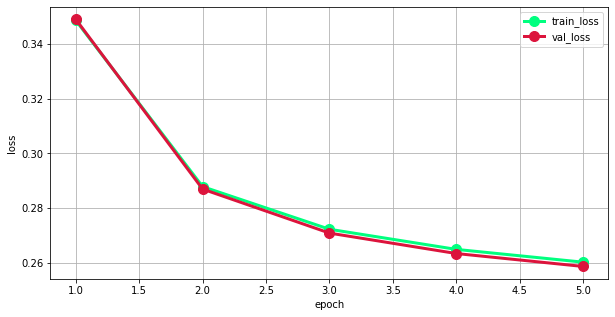

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 8


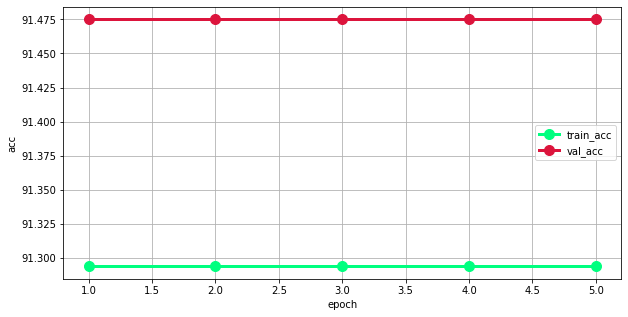

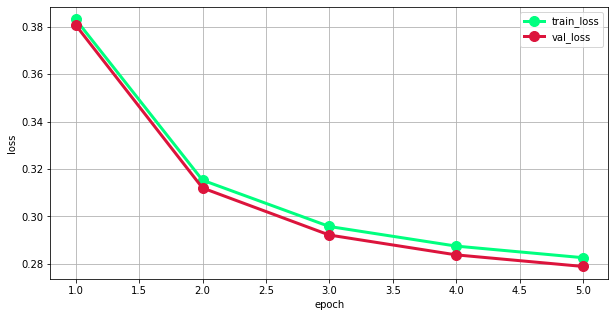

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 12


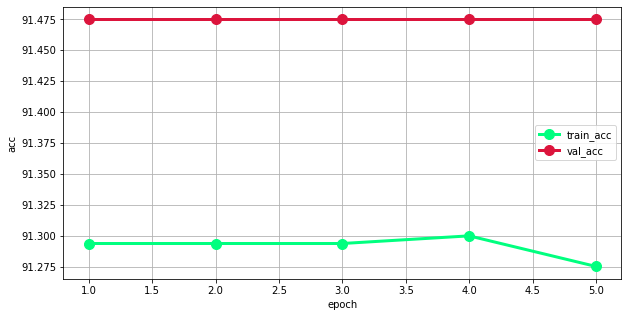

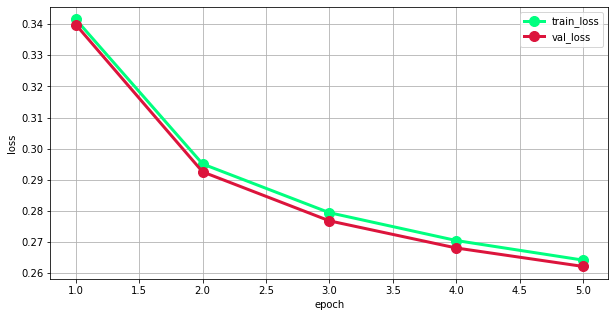

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 2


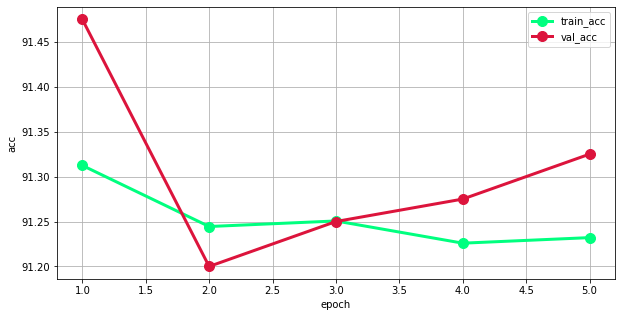

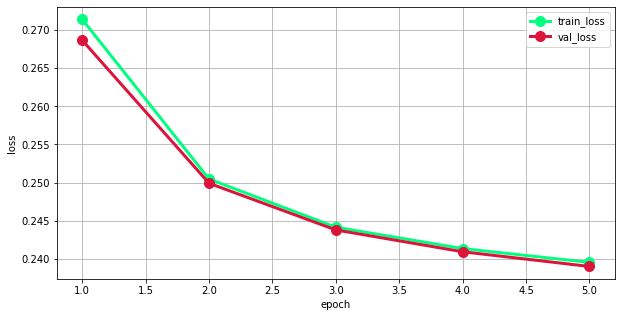

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 4


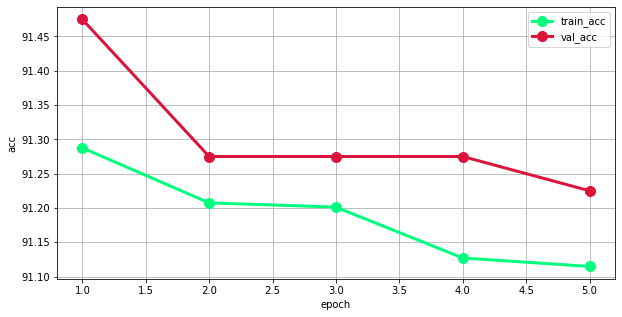

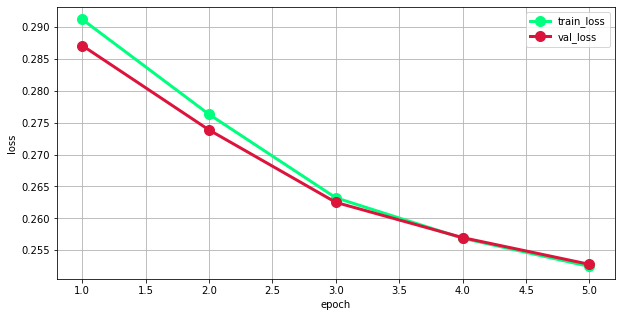

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 6


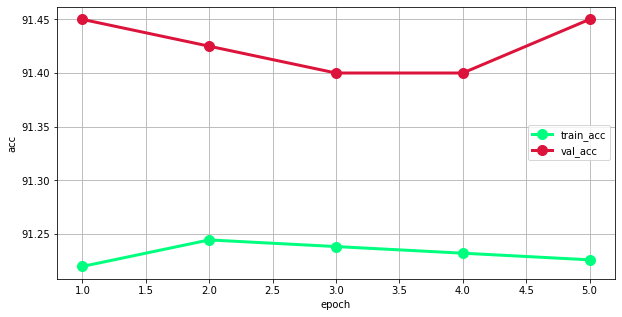

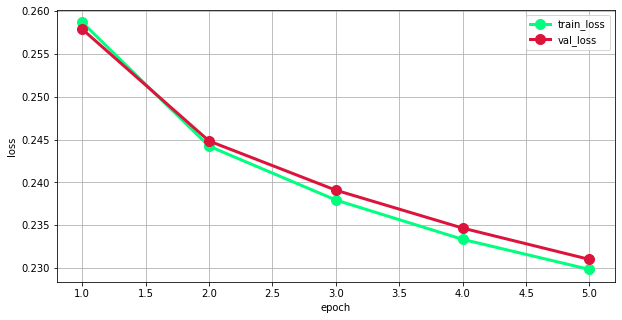

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 8


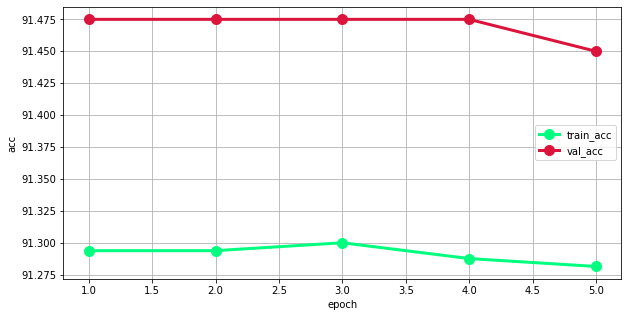

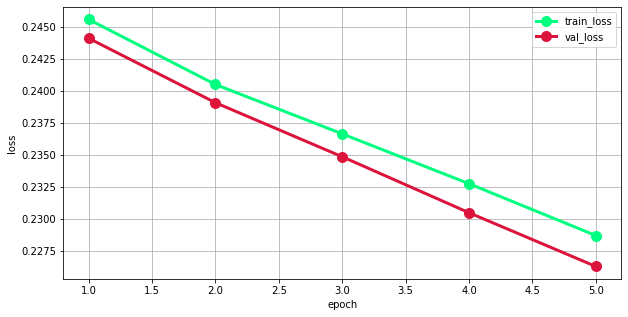

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 12


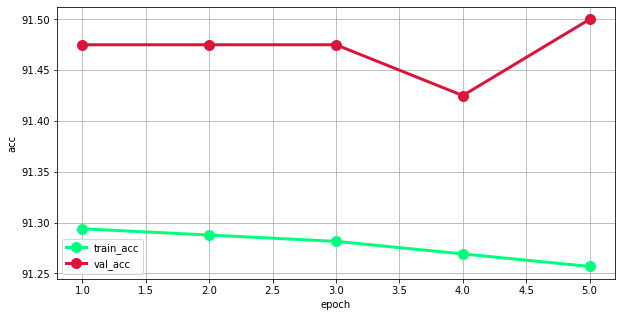

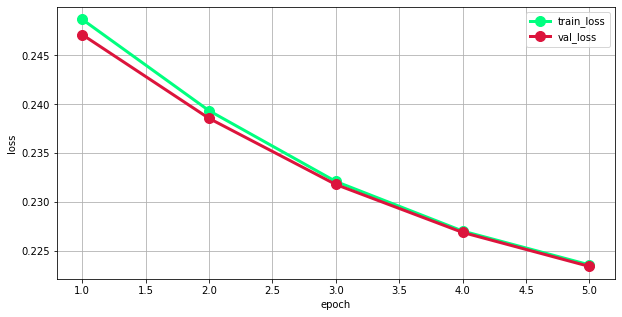

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 2


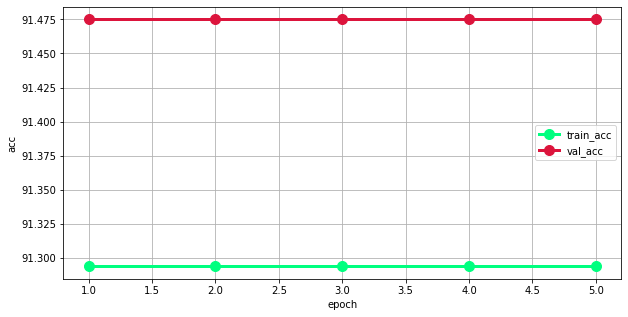

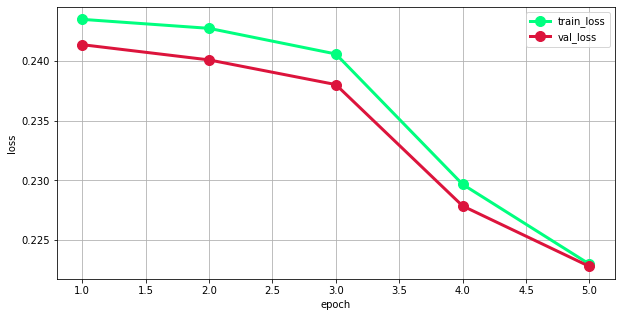

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 4


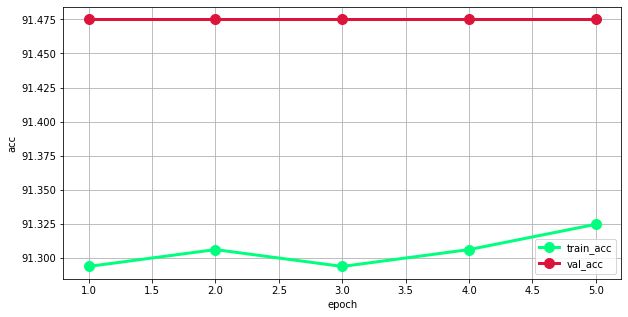

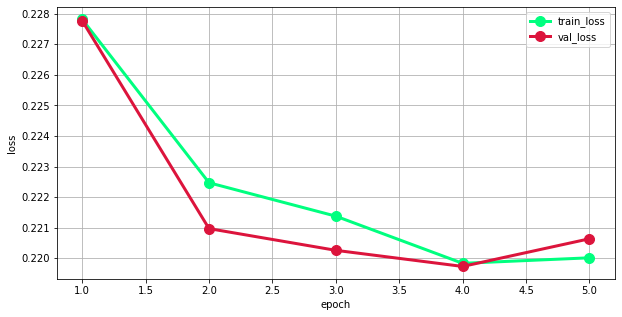

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 6


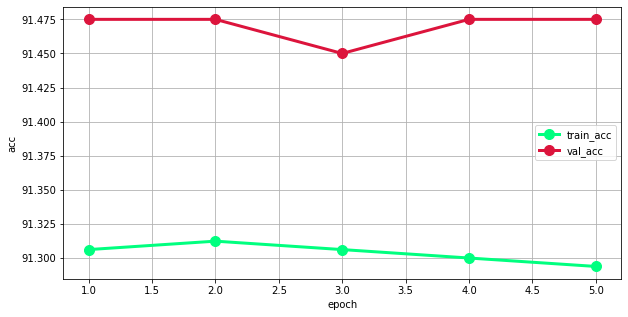

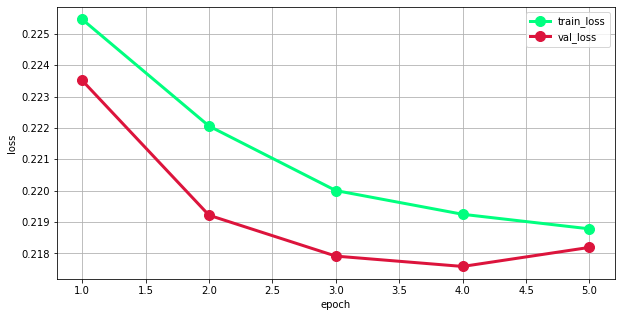

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 8


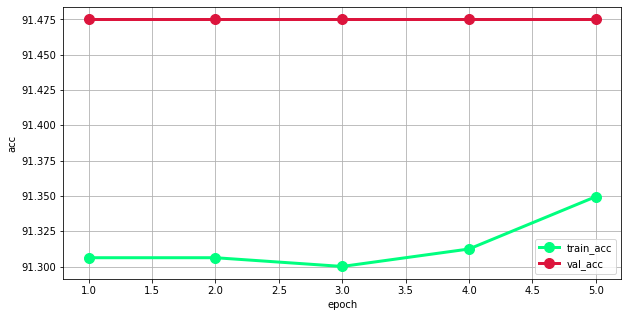

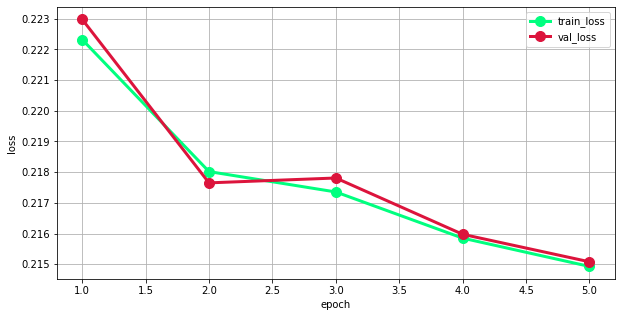

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 12


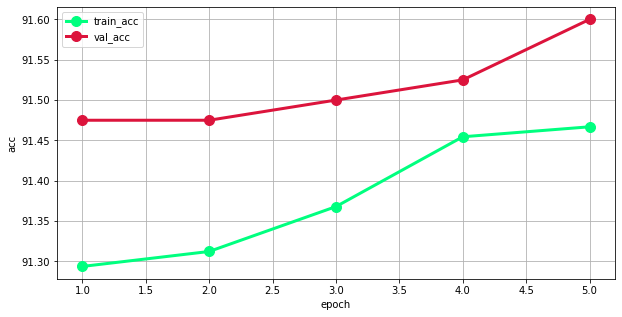

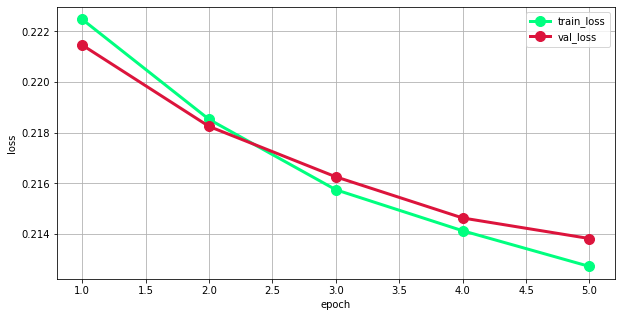

In [ ]:
for lr in lr_array:
  for size in size_array:
    df_temp = df_stats[(df_stats['Layer_size']==size) & (df_stats['Learning_rate']==lr)]
    epoch_array = df_temp["Epoch_no"].tolist()
    tr_acc_array = df_temp["train_acc"].tolist()
    val_acc_array = df_temp["val_acc"].tolist()
    tr_loss_array = df_temp["train_loss"].tolist()
    val_loss_array = df_temp["val_loss"].tolist()
    print("------------------------------------------------------------------------------------------")
    print("Learning rate:",lr)
    print("Size:",size)
    fig = plt.figure(figsize=(10,5))
    plt.plot(epoch_array,tr_acc_array,color = "springgreen",marker="o",linewidth = 3,markersize = 10)
    plt.plot(epoch_array,val_acc_array,color ="crimson",marker="o",linewidth = 3,markersize = 10)
    plt.legend(["train_acc",'val_acc'])
    plt.xlabel("epoch")
    plt.grid()
    plt.ylabel("acc")
    plt.show()
    fig = plt.figure(figsize=(10,5))
    plt.plot(epoch_array,tr_loss_array,marker="o",color = "springgreen",linewidth = 3,markersize = 10)
    plt.plot(epoch_array,val_loss_array,color ="crimson",marker="o",linewidth = 3,markersize = 10)
    plt.legend(["train_loss",'val_loss'])
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.grid()
    plt.show()

Text(0, 0.5, 'validation_loss')

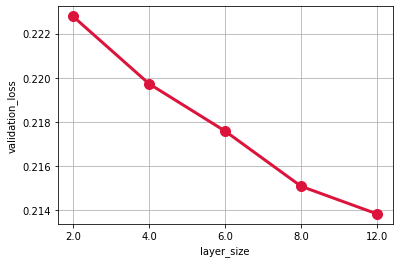

In [ ]:
dfk = df_stats[['Layer_size','val_loss']].groupby('Layer_size').min()
array = list(map(lambda x:str(x),dfk.index.tolist()))

plt.plot(array,dfk["val_loss"].tolist(),color="crimson",marker="o",linewidth = 3,markersize = 10)
plt.xlabel("layer_size")
plt.grid()
plt.ylabel("validation_loss")

Text(0, 0.5, 'validation_loss')

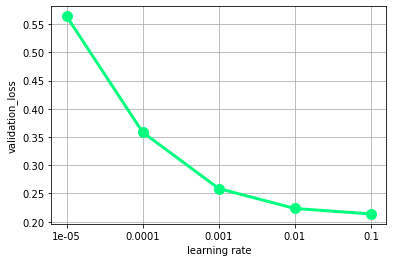

In [ ]:
dfk = df_stats[['Learning_rate','val_loss']].groupby('Learning_rate').min()
array = list(map(lambda x:str(x),dfk.index.tolist()))

plt.plot(array,dfk["val_loss"].tolist(),color="springgreen",marker="o",linewidth = 3,markersize = 10)
plt.xlabel("learning rate")
plt.grid()
plt.ylabel("validation_loss")

In [ ]:
df_stats_regr = pd.DataFrame(columns = ['Layer_size', 'Learning_rate', 'Epoch_no','train_loss','val_loss'])
df_stats_regr

,Layer_size,Learning_rate,Epoch_no,train_loss,val_loss


In [ ]:
class Neural_network_regr(nn.Module):
  def __init__(self,hidden_layer = 8):
    super(Neural_network_regr, self).__init__()
    self.fc1=nn.Linear(15,hidden_layer)
    self.fc2=nn.Linear(hidden_layer,1)
  
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
train_loader_r = torch.utils.data.DataLoader(dataset_r_train,batch_size=BATCH_SIZE,shuffle=False,drop_last=False)
val_loader_r = torch.utils.data.DataLoader(dataset_r_val,batch_size=BATCH_SIZE,shuffle=False,drop_last=False)
test_loader_r = torch.utils.data.DataLoader(dataset_r_test,batch_size=BATCH_SIZE,shuffle=False,drop_last=False)

In [ ]:
def fit_regr(input, train_loader, size, lr,val_loader):
    global df_stats_regr
    optimizer = torch.optim.SGD(model.parameters(),lr = lr)
    error = nn.MSELoss()
    print(error)
    EPOCHS = 10
    model.train()
 
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(x_batch.float())
            loss = error(output, y_batch)
            loss.backward()
            optimizer.step()
            correct += (output>0.5).sum()
            if batch_idx % 500 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t '.format(epoch+1, batch_idx*16, len(train_loader), 100*batch_idx / len(train_loader), loss.data))
                
        
        running_loss_train = 0 
        running_loss_val = 0
        for val_imgs, val_labels in val_loader:
            val_imgs = Variable(val_imgs.float())
            output = model(val_imgs)
            loss = error(output, val_labels)
            running_loss_val += loss.item() * val_imgs.size(0)
 
        print("Val loss:{:.5f} ".format( running_loss_val/(len(val_loader)*BATCH_SIZE)))
 
        for train_imgs, train_labels in train_loader:
            train_imgs = Variable(train_imgs.float())

            output = model(train_imgs)
            loss = error(output, train_labels)
            running_loss_train += loss.item() * train_imgs.size(0)
           
            
        print("Train loss:{:.5f} ".format( running_loss_train/(len(train_loader)*BATCH_SIZE)))
        df_stats_regr = df_stats_regr.append({'Layer_size':size, 'Learning_rate':lr, 'Epoch_no':epoch+1,'train_loss':running_loss_train/(len(train_loader)*BATCH_SIZE) ,
                              'val_loss':running_loss_val/(len(val_loader)*BATCH_SIZE)},ignore_index = True)

In [ ]:
size_array = [2,4,6,8,12]
lr_array = [1e-5,1e-4,1e-3,1e-2,1e-1]
for size in size_array:
  for lr in lr_array:
    print("Size:",size)
    print("Learning rate:",lr)
    model = Neural_network_regr(size)
    fit_regr(model,train_loader_r,size,lr,val_loader_r)
    print("----------------------------------------------------------------------------------------------------------")

Size: 2
Learning rate: 1e-05
MSELoss()
Epoch : 1 [0/2023 (0%)]	Loss: 0.973237	 
Epoch : 1 [8000/2023 (25%)]	Loss: 0.834323	 
Epoch : 1 [16000/2023 (49%)]	Loss: 1.016171	 
Epoch : 1 [24000/2023 (74%)]	Loss: 0.551727	 
Epoch : 1 [32000/2023 (99%)]	Loss: 1.727759	 
Val loss:1.11685 
Train loss:1.14870 
Epoch : 2 [0/2023 (0%)]	Loss: 0.948984	 
Epoch : 2 [8000/2023 (25%)]	Loss: 0.812037	 
Epoch : 2 [16000/2023 (49%)]	Loss: 0.989654	 
Epoch : 2 [24000/2023 (74%)]	Loss: 0.546962	 
Epoch : 2 [32000/2023 (99%)]	Loss: 1.715755	 
Val loss:1.10387 
Train loss:1.13604 
Epoch : 3 [0/2023 (0%)]	Loss: 0.926437	 
Epoch : 3 [8000/2023 (25%)]	Loss: 0.791351	 
Epoch : 3 [16000/2023 (49%)]	Loss: 0.964853	 
Epoch : 3 [24000/2023 (74%)]	Loss: 0.542961	 
Epoch : 3 [32000/2023 (99%)]	Loss: 1.704908	 
Val loss:1.09199 
Train loss:1.12447 
Epoch : 4 [0/2023 (0%)]	Loss: 0.905451	 
Epoch : 4 [8000/2023 (25%)]	Loss: 0.772121	 
Epoch : 4 [16000/2023 (49%)]	Loss: 0.941629	 
Epoch : 4 [24000/2023 (74%)]	Loss: 0.539623

In [ ]:
df_stats_regr

,Layer_size,Learning_rate,Epoch_no,train_loss,val_loss
0,2.0,0.00001,1.0,1.148697,1.116848
1,2.0,0.00001,2.0,1.136044,1.103872
2,2.0,0.00001,3.0,1.124475,1.091992
3,2.0,0.00001,4.0,1.113880,1.081091
4,2.0,0.00001,5.0,1.104180,1.071088
...,...,...,...,...,...
245,12.0,0.10000,6.0,NaN,NaN
246,12.0,0.10000,7.0,NaN,NaN
247,12.0,0.10000,8.0,NaN,NaN
248,12.0,0.10000,9.0,NaN,NaN


------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 2


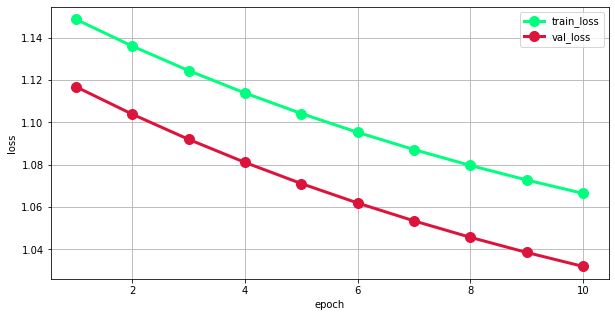

------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 4


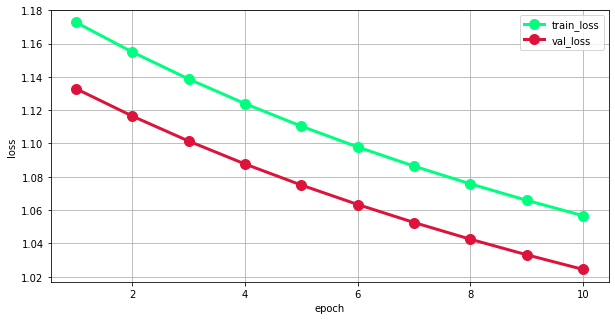

------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 6


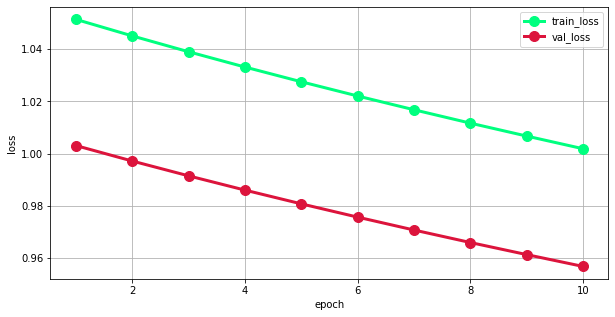

------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 8


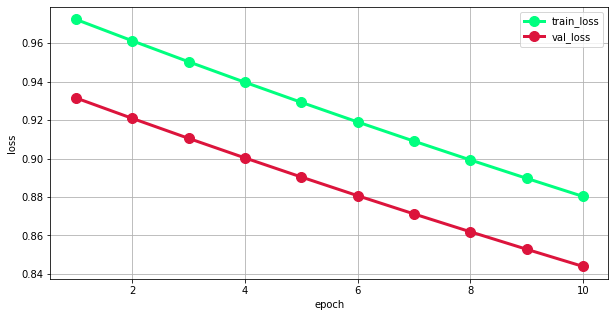

------------------------------------------------------------------------------------------
Learning rate: 1e-05
Size: 12


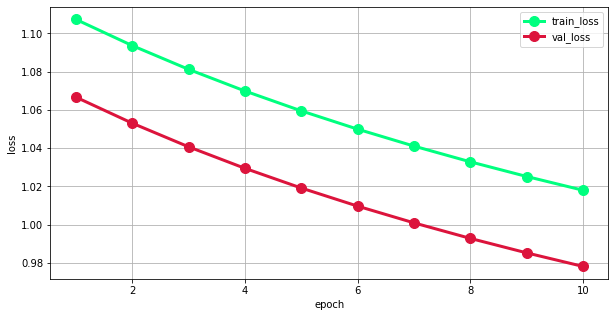

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 2


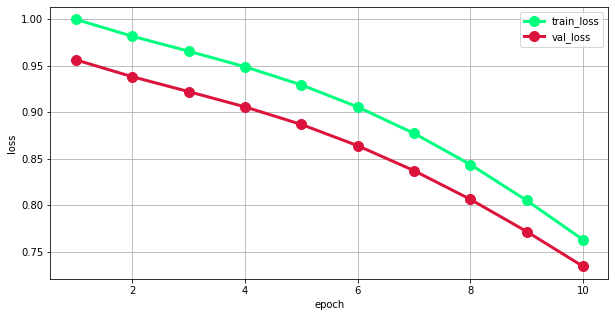

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 4


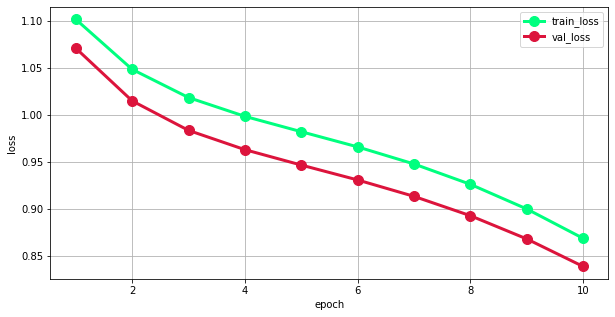

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 6


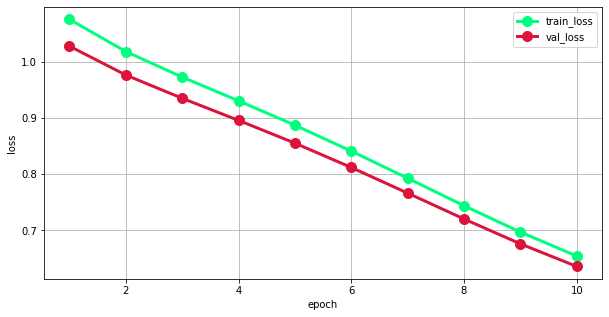

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 8


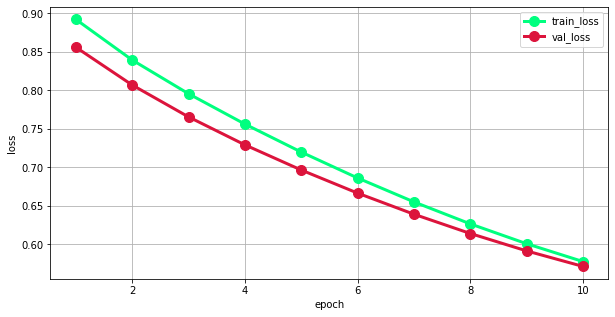

------------------------------------------------------------------------------------------
Learning rate: 0.0001
Size: 12


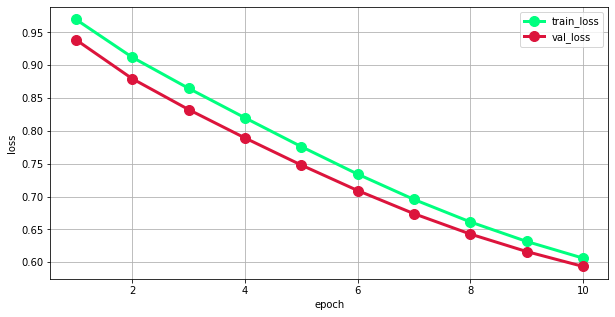

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 2


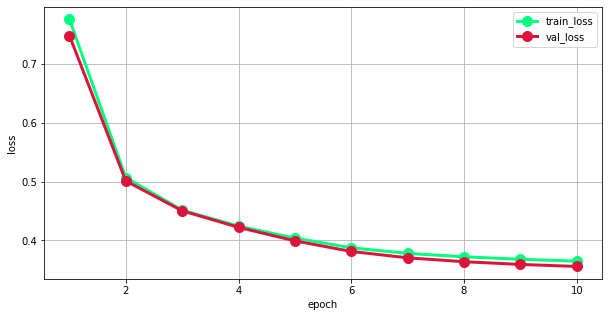

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 4


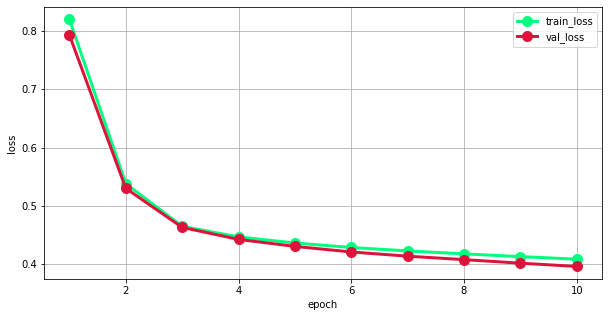

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 6


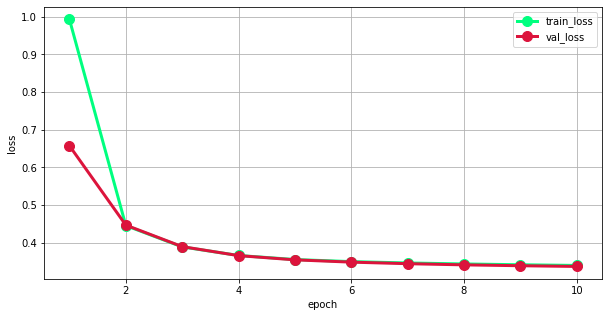

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 8


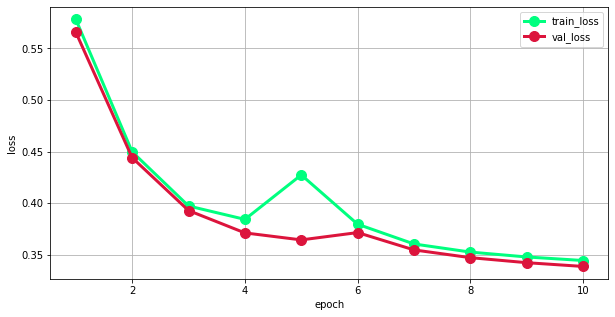

------------------------------------------------------------------------------------------
Learning rate: 0.001
Size: 12


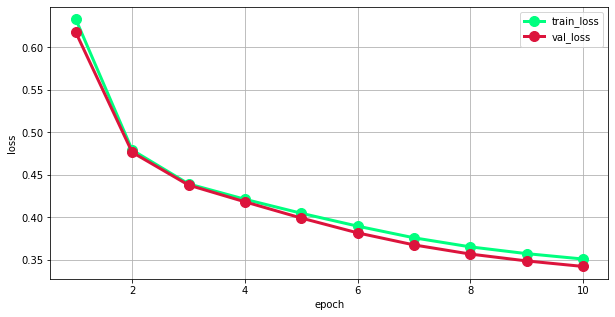

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 2


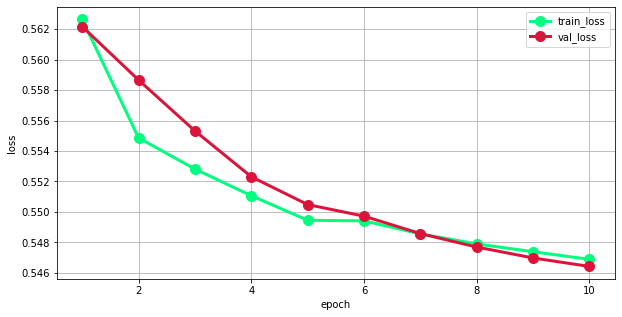

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 4


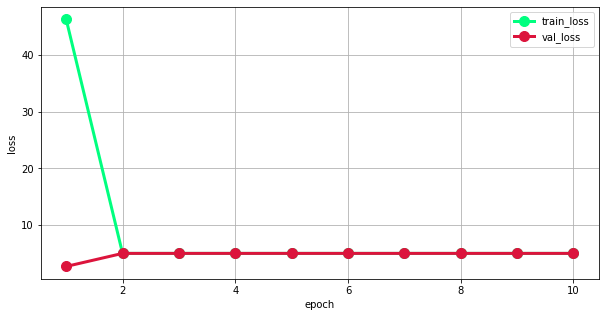

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 6


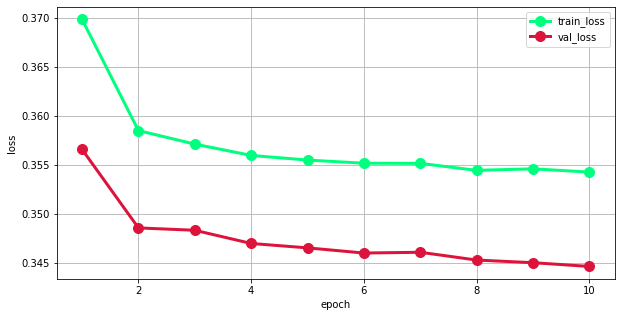

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 8


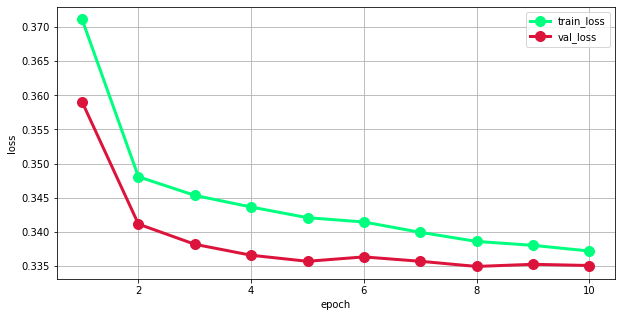

------------------------------------------------------------------------------------------
Learning rate: 0.01
Size: 12


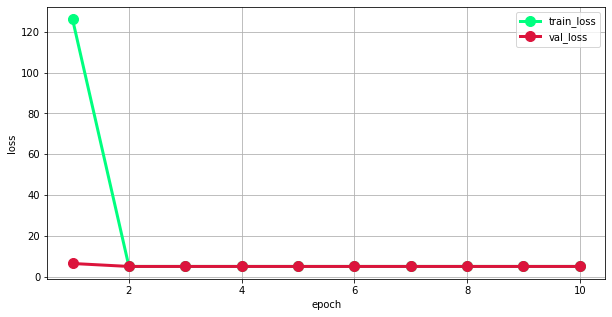

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 2


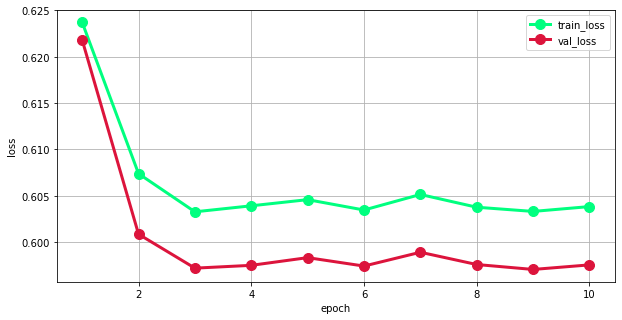

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 4


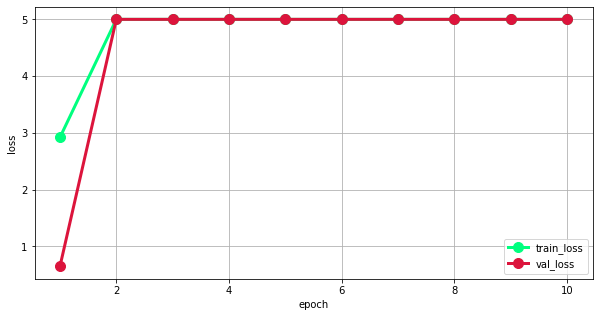

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 6


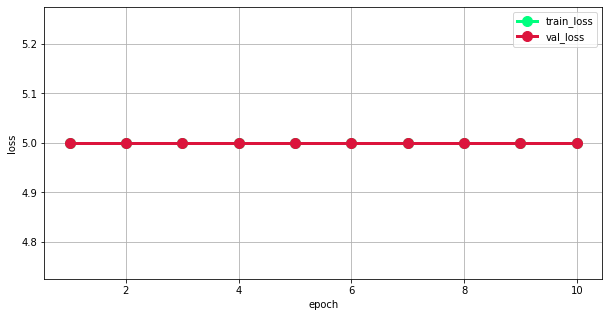

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 8


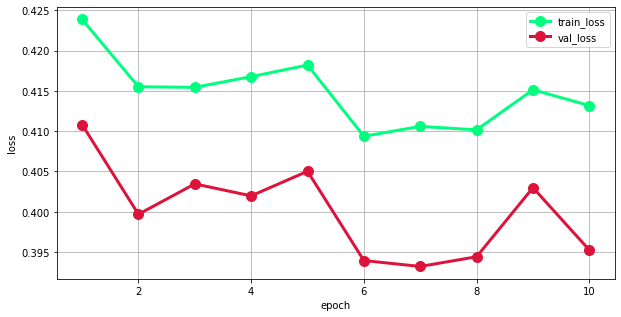

------------------------------------------------------------------------------------------
Learning rate: 0.1
Size: 12


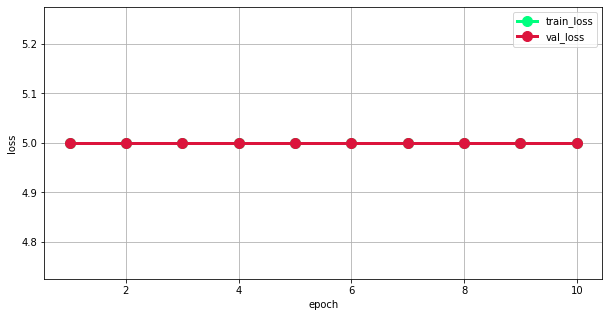

In [ ]:
for lr in lr_array:
  for size in size_array:
    df_temp = df_stats_regr[(df_stats_regr['Layer_size']==size) & (df_stats_regr['Learning_rate']==lr)].fillna(5)
    epoch_array = df_temp["Epoch_no"].tolist()
    tr_loss_array = df_temp["train_loss"].tolist()
    val_loss_array = df_temp["val_loss"].tolist()
    print("------------------------------------------------------------------------------------------")
    print("Learning rate:",lr)
    print("Size:",size)
    fig = plt.figure(figsize=(10,5))
    plt.plot(epoch_array,tr_loss_array,color ="springgreen",marker="o",linewidth = 3,markersize = 10)
    plt.plot(epoch_array,val_loss_array,color ="crimson",marker="o",linewidth = 3,markersize = 10)
    plt.legend(["train_loss",'val_loss'])
    plt.grid()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.show()

Text(0, 0.5, 'validation_loss')

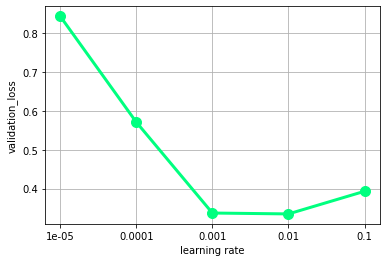

In [ ]:
dfk = df_stats_regr[['Learning_rate','val_loss']].groupby('Learning_rate').min()
array = list(map(lambda x:str(x),dfk.index.tolist()))

plt.plot(array,dfk["val_loss"].tolist(),color="springgreen",marker="o",linewidth = 3,markersize = 10)
plt.grid()
plt.xlabel("learning rate")
plt.ylabel("validation_loss")

Text(0, 0.5, 'validation_loss')

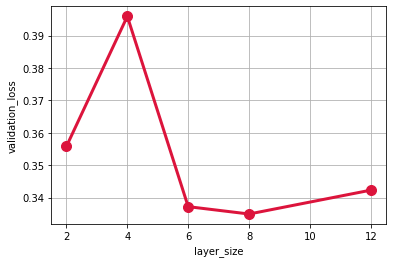

In [ ]:
plt.plot(df_stats_regr[['Layer_size','val_loss']].groupby('Layer_size').min(),color="crimson",marker="o",linewidth = 3,markersize = 10)
plt.xlabel("layer_size")
plt.grid()
plt.ylabel("validation_loss")